In [1]:

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [3]:
df = pd.read_csv('customertotal.csv')
df.head(1)

,Unnamed: 0,loyalty number,year,month,flights booked,flights with companions,total flights,distance,points accumulated,points redeemed,dollar cost points redeemed,country,province,city,postal code,gender,education,marital status,loyalty card,enrollment type,enrollment year,enrollment month,cancellation year,cancellation month,salary
0,0,480934,2017,1,0,0,0,0,0,0,0.0,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,Married,Star,Standard,2016,2,NaN,NaN,83236.0


### Fase 2: Visualización

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [16]:
vuelos_mes = df.groupby('month')['flights booked'].sum().reset_index()


Text(0, 0.5, 'Cantidad de vuelos reservados')

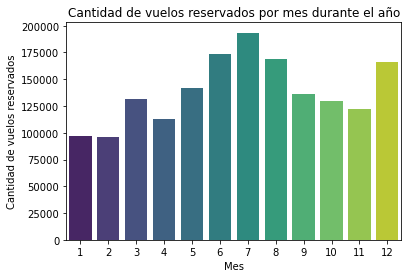

In [28]:
sns.barplot(x='month', y='flights booked', data=vuelos_mes, palette='viridis')
plt.title('Cantidad de vuelos reservados por mes durante el año')
plt.xlabel('Mes')
plt.ylabel('Cantidad de vuelos reservados')

La gráfica nos muestra que los meses con un mayor número de vuelos reservados son los meses de verano (junio, julio y agosto) y diciembre, podría estar relacionado con las vaciones de verano y navidad.

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

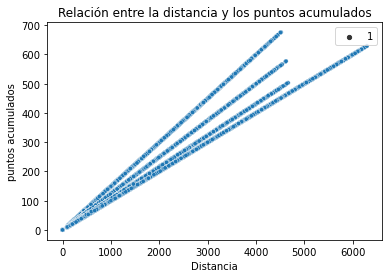

In [47]:
sns.scatterplot(x = "distance", y = "points accumulated",  data = df, size = 1, );
plt.title('Relación entre la distancia y los puntos acumulados')
plt.xlabel('Distancia')
plt.ylabel('puntos acumulados');

Claramente, hay relación entre los puntos acumulados y la distancia. Cuanta más distancias, más puntos acumulados

3. ¿Cuál es la distribución de los clientes por provincia o estado?

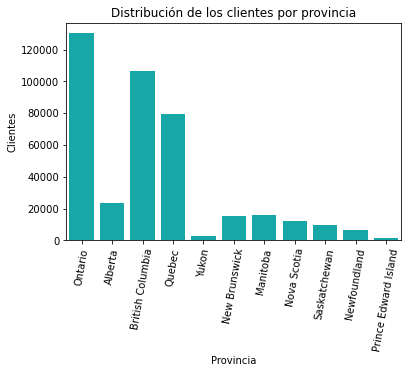

In [48]:
#La elección es countplot porque se trata de una variable categórica.
sns.countplot(x = "province", data = df, color = "c");
plt.xticks(rotation = 80)
plt.title('Distribución de los clientes por provincia')
plt.xlabel('Provincia')
plt.ylabel('Clientes');

La mayoría de los clientes proceden de Ontario.

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [51]:
salario_promedio_educacion = df.groupby('education')['salary'].mean().reset_index()
salario_promedio_educacion

,education,salary
0,Bachelor,72672.540866
1,College,77261.587600
2,Doctor,178403.675202
3,High School or Below,61143.532170
4,Master,103734.523724


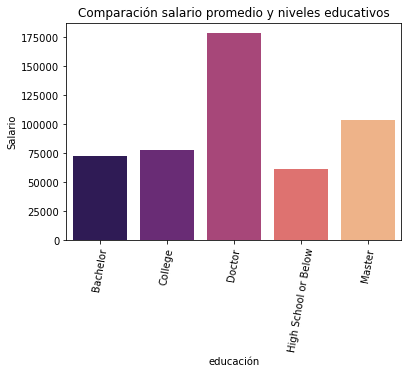

In [55]:
#Barplot porque compara una variable categórica con una variable númerica
sns.barplot(x = "education", y = "salary", data = salario_promedio_educacion, palette = "magma")
plt.title('Comparación salario promedio y niveles educativos')
plt.xlabel('educación')
plt.ylabel('Salario');
plt.xticks(rotation = 80);

Doctor, es el nivel de estudio más alto en Canada, por ello son los que tienen un salario más alto, seguido por las personas que llegaron al nivel master que sería el segundo superior. Y los que tendrían un menor salario serían las personas del último nivel, High school or below.

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

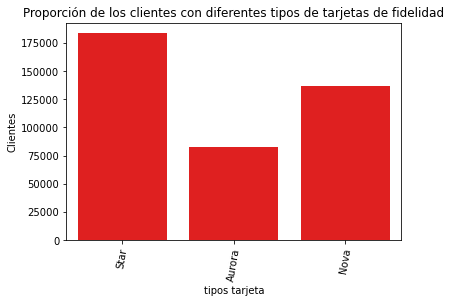

In [61]:
sns.countplot(x = "loyalty card", data = df, color = "r");
plt.xticks(rotation = 80)
plt.title('Proporción de los clientes con diferentes tipos de tarjetas de fidelidad')
plt.xlabel('tipos tarjeta')
plt.ylabel('Clientes');

6. ¿Cómo se distribuyen los clientes según su estado civil y género?

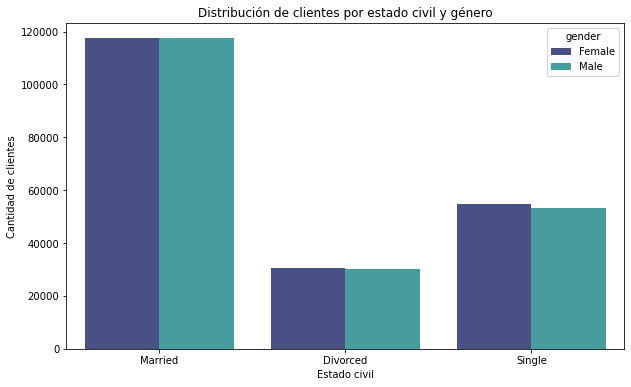

In [70]:
plt.figure(figsize=(10, 6))
sns.countplot(x='marital status', hue='gender', data=df, palette='mako')
plt.title('Distribución de clientes por estado civil y género')
plt.xlabel('Estado civil')
plt.ylabel('Cantidad de clientes');


Las diferencias entre generos son nulas respecto a su estado civil. La mayoria de los clientes se encuentran casados.